Testing and appying PYMC tutorial stochastic volatility model

In [2]:
import pandas as pd
import quandl

import numpy as np
import pymc3 as pm
from pymc3.distributions.timeseries import GaussianRandomWalk

from scipy import optimize

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
n = 2000
data = quandl.get("CHRIS/ICE_B1")[-n:]
returns = data.Change

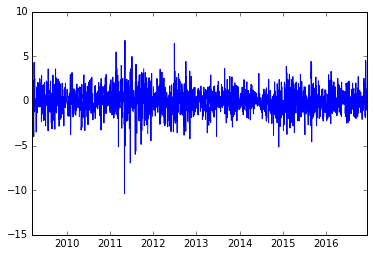

In [4]:
plt.plot(returns)

In [5]:
model = pm.Model()
with model:
    sigma = pm.Exponential('sigma', 1./.02, testval=.1)

    nu = pm.Exponential('nu', 1./10)
    s = GaussianRandomWalk('s', sigma**-2, shape=n)

    r = pm.StudentT('r', nu, lam=pm.math.exp(-2*s), observed=returns)

In [6]:
with model:
    trace = pm.sample(2000)

100%|██████████| 2000/2000 [24:57<00:00,  2.99it/s]


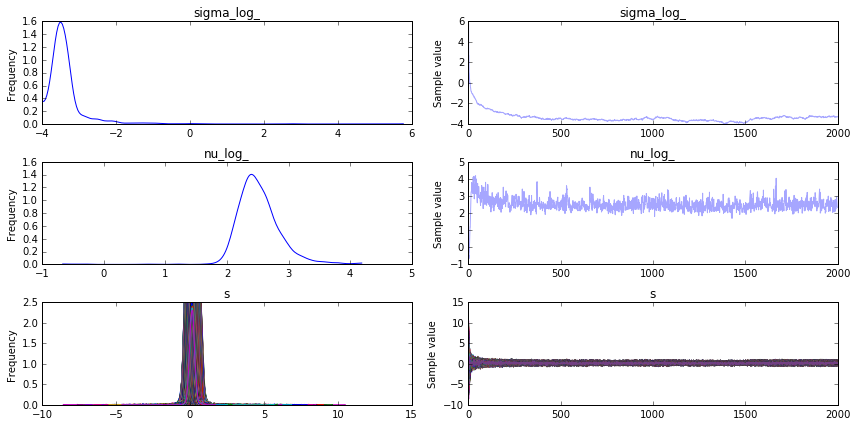

In [7]:
figsize(12,6)
pm.traceplot(trace, model.vars[:-1]);

In [21]:
import seaborn as sns

/Users/ikorovkin1/anaconda2/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


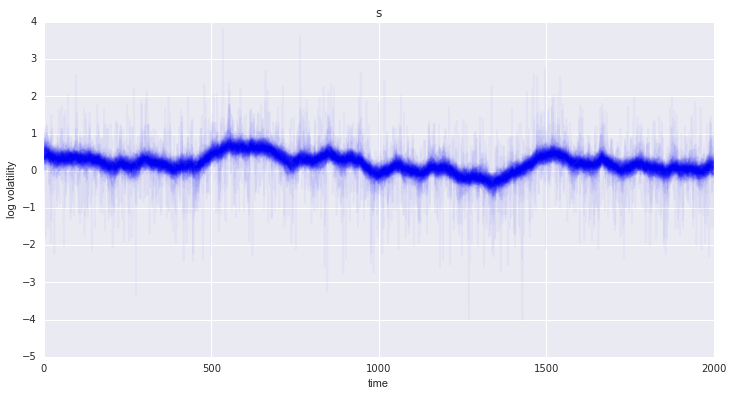

In [22]:
figsize(12,6)
title(str(s))
plot(trace[s][::10].T,'b', alpha=.03);
xlabel('time')
ylabel('log volatility')

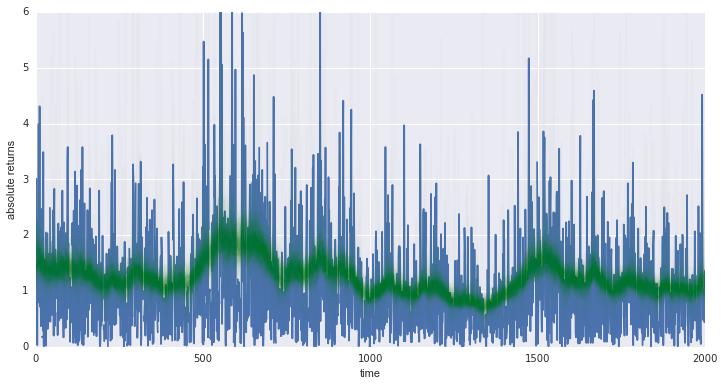

In [29]:


plot(np.abs(numpyMatrix))
plot(np.exp(trace[s][::10].T), 'g', alpha=.01);
sd = np.exp(trace[s].T)
axes = plt.gca()
axes.set_xlim([0,2000])
axes.set_ylim([0,6])

xlabel('time')
ylabel('absolute returns')

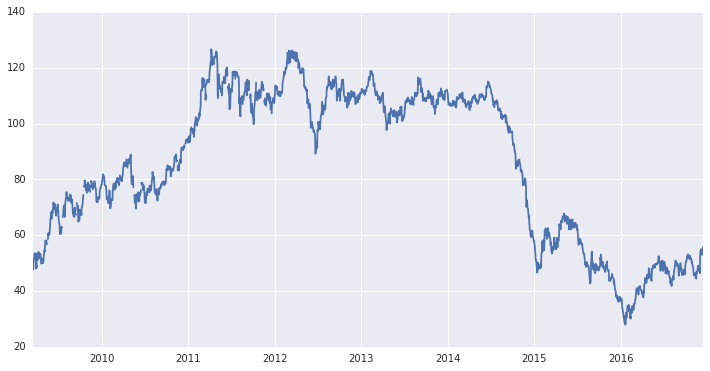

In [31]:
plt.plot(data.Settle)